### Importing libraries:

In [179]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset Google Trends Nike (last 5 years):

In [196]:
#Importing google trends csv and dropping first row: 'Categoría: Todas las categorías'
google_trends = pd.read_csv("Data/google_trends_nike_5lastyears.csv", skiprows=2)
google_trends.head()

,Semana,nike: (Todo el mundo)
0,2015-08-02,51
1,2015-08-09,52
2,2015-08-16,51
3,2015-08-23,52
4,2015-08-30,51


In [197]:
google_trends.columns

Index(['Semana', 'nike: (Todo el mundo)'], dtype='object')

In [198]:
#Renaming columns
google_trends.rename(columns = {'Semana':'Date', 'nike: (Todo el mundo)': 'Google trends'}, inplace=True)
google_trends

,Date,Google trends
0,2015-08-02,51
1,2015-08-09,52
2,2015-08-16,51
3,2015-08-23,52
4,2015-08-30,51
...,...,...
255,2020-06-21,56
256,2020-06-28,58
257,2020-07-05,57
258,2020-07-12,58


In [199]:
google_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           260 non-null    object
 1   Google trends  260 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


### Dataset stock market Nike (last 5 years):

In [184]:
stockmarket = pd.read_csv("Data/stock_market_nike_5lastyears.csv")
stockmarket.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 19, 2020",98.43,95.50,100.18,95.11,25.95M,2.23%
1,"Jul 12, 2020",96.28,98.25,99.04,95.51,26.04M,-1.75%
2,"Jul 05, 2020",97.99,99.62,100.03,95.72,27.23M,-0.45%
3,"Jun 28, 2020",98.43,93.70,99.66,93.70,29.78M,5.08%
4,"Jun 21, 2020",93.67,96.85,102.22,93.57,58.48M,-2.20%


In [186]:
#Deleting string 'M' from 'Vol.' column
stockmarket['Vol.'] = stockmarket['Vol.'].str.replace(r"M","")

In [187]:
#Convert the strings in 'Vol.' to integers
stockmarket['Vol.'] = pd.to_numeric(stockmarket['Vol.'])

In [188]:
stockmarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      260 non-null    object 
 1   Price     260 non-null    float64
 2   Open      260 non-null    float64
 3   High      260 non-null    float64
 4   Low       260 non-null    float64
 5   Vol.      260 non-null    float64
 6   Change %  260 non-null    object 
dtypes: float64(5), object(2)
memory usage: 14.3+ KB


### Merge:

In [200]:
#Need same date format in both datasets
google_trends['Date'] = pd.to_datetime(google_trends['Date'])
google_trends.head()

,Date,Google trends
0,2015-08-02,51
1,2015-08-09,52
2,2015-08-16,51
3,2015-08-23,52
4,2015-08-30,51


In [192]:
stockmarket['Date'] = pd.to_datetime(stockmarket['Date'])

In [193]:
#Changing the order of 'Date' column to have same order as in google_trends 'Date'
stock_market = stockmarket.sort_values('Date',ascending=True)
stock_market.head()

,Date,Price,Open,High,Low,Vol.,Change %
259,2015-08-02,57.26,57.76,58.86,56.55,29.19,-0.61%
258,2015-08-09,57.18,57.70,58.09,55.33,27.49,-0.14%
257,2015-08-16,53.44,57.06,58.02,53.42,36.26,-6.54%
256,2015-08-23,56.25,50.13,56.50,47.25,69.80,5.26%
255,2015-08-30,54.84,56.20,56.24,54.02,38.19,-2.51%


In [201]:
#Merge
nike = pd.merge(google_trends, stock_market, on='Date')
nike

,Date,Google trends,Price,Open,High,Low,Vol.,Change %
0,2015-08-02,51,57.26,57.76,58.86,56.55,29.19,-0.61%
1,2015-08-09,52,57.18,57.70,58.09,55.33,27.49,-0.14%
2,2015-08-16,51,53.44,57.06,58.02,53.42,36.26,-6.54%
3,2015-08-23,52,56.25,50.13,56.50,47.25,69.80,5.26%
4,2015-08-30,51,54.84,56.20,56.24,54.02,38.19,-2.51%
...,...,...,...,...,...,...,...,...
255,2020-06-21,56,93.67,96.85,102.22,93.57,58.48,-2.20%
256,2020-06-28,58,98.43,93.70,99.66,93.70,29.78,5.08%
257,2020-07-05,57,97.99,99.62,100.03,95.72,27.23,-0.45%
258,2020-07-12,58,96.28,98.25,99.04,95.51,26.04,-1.75%


In [202]:
#Exporting Nike dataset
nike.to_csv("Data/nike_clean_dataset.csv")

In [203]:
nike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           260 non-null    datetime64[ns]
 1   Google trends  260 non-null    int64         
 2   Price          260 non-null    float64       
 3   Open           260 non-null    float64       
 4   High           260 non-null    float64       
 5   Low            260 non-null    float64       
 6   Vol.           260 non-null    float64       
 7   Change %       260 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 18.3+ KB


In [204]:
nike.describe()

,Google trends,Price,Open,High,Low,Vol.
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,50.850000,70.330346,70.091231,71.984154,68.402654,40.476923
std,6.270341,15.274797,15.150424,15.720461,14.861066,15.819003
min,39.000000,49.960000,50.130000,51.150000,47.250000,16.900000
25%,47.000000,56.472500,56.552500,58.072500,55.315000,29.570000
50%,50.000000,66.130000,65.860000,67.440000,64.220000,36.700000
75%,54.000000,83.605000,83.377500,85.757500,81.245000,47.315000
max,100.000000,104.530000,104.250000,105.620000,101.660000,104.320000


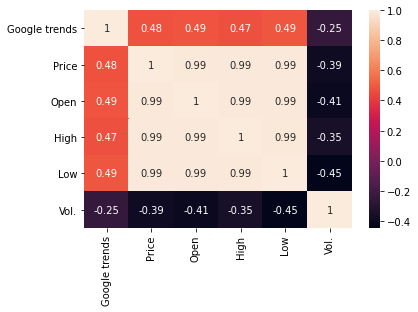

In [205]:
corrMatrix = nike.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

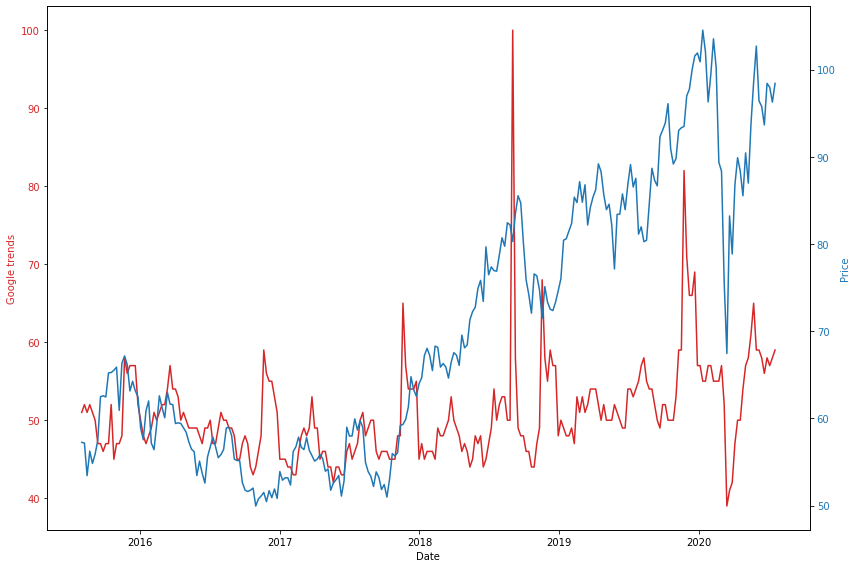

In [215]:
fig, ax1 = plt.subplots(figsize=(12,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Google trends', color=color)
ax1.plot(nike['Date'], nike['Google trends'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)
ax2.plot(nike['Date'], nike['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

### Colin Kaepernick 2018:

In [282]:
#Importing Google trends 'Colin Kaepernick' csv from 2018
colin_kaepernick = pd.read_csv("Data/google_trends_colin_kaepernick_2018.csv", skiprows=2)
colin_kaepernick.head()

,Semana,Colin Kaepernick: (Todo el mundo)
0,2018-01-07,2
1,2018-01-14,2
2,2018-01-21,2
3,2018-01-28,2
4,2018-02-04,3


In [283]:
colin_kaepernick.columns

Index(['Semana', 'Colin Kaepernick: (Todo el mundo)'], dtype='object')

In [284]:
#Renaming columns
colin_kaepernick.rename(columns = {'Semana':'Date', 
                                   'Colin Kaepernick: (Todo el mundo)': 'Nike Colin Kaepernick'}, inplace=True)
colin_kaepernick.columns

Index(['Date', 'Nike Colin Kaepernick'], dtype='object')

In [285]:
colin_kaepernick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   52 non-null     object
 1   Nike Colin Kaepernick  52 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [286]:
stock_market_nike_2018 = pd.read_csv("Data/stock_market_nike_2018.csv")
stock_market_nike_2018.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Dec 30, 2018",74.65,73.98,75.12,71.21,28.13M,1.79%
1,"Dec 23, 2018",73.34,71.40,74.46,68.08,33.77M,1.34%
2,"Dec 16, 2018",72.37,71.37,74.29,66.53,69.58M,-0.22%
3,"Dec 09, 2018",72.53,73.10,75.28,70.61,36.66M,-1.10%
4,"Dec 02, 2018",73.34,77.10,79.00,72.87,34.84M,-2.37%


In [287]:
#Need same date format in both datasets
colin_kaepernick['Date'] = pd.to_datetime(colin_kaepernick['Date'])
colin_kaepernick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   52 non-null     datetime64[ns]
 1   Nike Colin Kaepernick  52 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 960.0 bytes


In [288]:
stock_market_nike_2018['Date'] = pd.to_datetime(stock_market_nike_2018['Date'])
stock_market_nike_2018.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2018-12-30,74.65,73.98,75.12,71.21,28.13M,1.79%
1,2018-12-23,73.34,71.40,74.46,68.08,33.77M,1.34%
2,2018-12-16,72.37,71.37,74.29,66.53,69.58M,-0.22%
3,2018-12-09,72.53,73.10,75.28,70.61,36.66M,-1.10%
4,2018-12-02,73.34,77.10,79.00,72.87,34.84M,-2.37%


In [289]:
#Changing the order of 'Date' column
stock_market_nike_2018 = stock_market_nike_2018.sort_values('Date',ascending=True)
stock_market_nike_2018.head()

,Date,Price,Open,High,Low,Vol.,Change %
51,2018-01-07,64.67,64.15,64.72,63.44,35.93M,1.08%
50,2018-01-14,67.21,64.78,67.24,63.08,35.09M,3.93%
49,2018-01-21,68.04,66.55,68.64,65.76,34.32M,1.23%
48,2018-01-28,67.22,67.82,68.83,66.70,37.59M,-1.21%
47,2018-02-04,65.49,66.63,67.21,62.09,62.61M,-2.57%


In [290]:
nike_2018 = pd.merge(colin_kaepernick, stock_market_nike_2018, on='Date')
nike_2018.head()

,Date,Nike Colin Kaepernick,Price,Open,High,Low,Vol.,Change %
0,2018-01-07,2,64.67,64.15,64.72,63.44,35.93M,1.08%
1,2018-01-14,2,67.21,64.78,67.24,63.08,35.09M,3.93%
2,2018-01-21,2,68.04,66.55,68.64,65.76,34.32M,1.23%
3,2018-01-28,2,67.22,67.82,68.83,66.70,37.59M,-1.21%
4,2018-02-04,3,65.49,66.63,67.21,62.09,62.61M,-2.57%


In [334]:
#Exporting dataset
nike_2018.to_csv("Data/nike_2018_clean_dataset.csv")

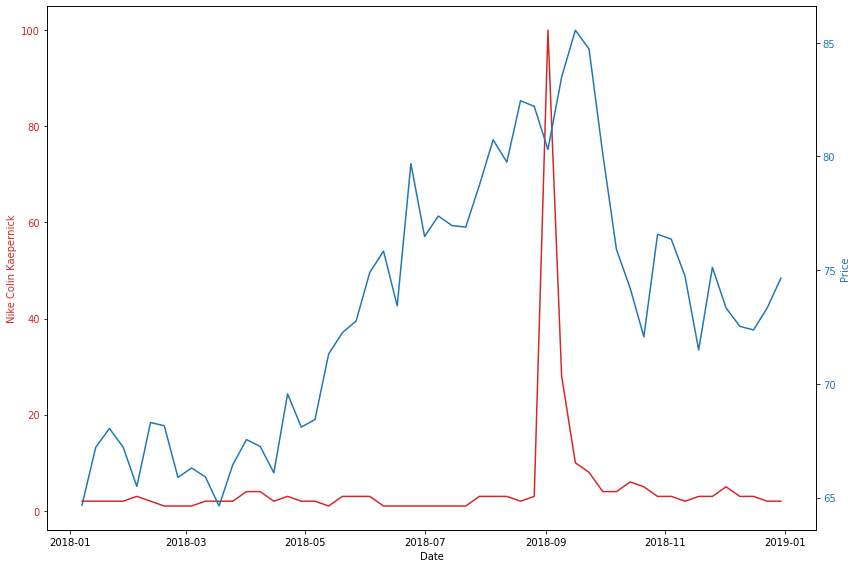

In [291]:
fig, ax1 = plt.subplots(figsize=(12,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Nike Colin Kaepernick', color=color)
ax1.plot(nike_2018['Date'], nike_2018['Nike Colin Kaepernick'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)
ax2.plot(nike_2018['Date'], nike_2018['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

### John Donahoe, new CEO of Nike:

In [324]:
#Importing Google trends 'John Donahoe' csv from 2019
john_donahoe = pd.read_csv("Data/google_trends_john_donahoe_2019.csv", skiprows=2)
john_donahoe.head()

,Semana,John Donahoe: (Todo el mundo)
0,2019-01-06,2
1,2019-01-13,7
2,2019-01-20,5
3,2019-01-27,4
4,2019-02-03,4


In [325]:
john_donahoe.columns

Index(['Semana', 'John Donahoe: (Todo el mundo)'], dtype='object')

In [326]:
#Renaming columns
john_donahoe.rename(columns = {'Semana':'Date', 
                                   'John Donahoe: (Todo el mundo)': 'John Donahoe Nike'}, inplace=True)
john_donahoe.columns

Index(['Date', 'John Donahoe Nike'], dtype='object')

In [331]:
#Need same date format in both datasets
john_donahoe['Date'] = pd.to_datetime(john_donahoe['Date'])
john_donahoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               52 non-null     datetime64[ns]
 1   John Donahoe Nike  52 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 960.0 bytes


In [327]:
#Importing stock market from 2019
stock_market_nike_2019 = pd.read_csv("Data/stock_market_nike_2019.csv")

In [328]:
stock_market_nike_2019['Date'] = pd.to_datetime(stock_market_nike_2019['Date'])
stock_market_nike_2019.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-12-29,101.92,101.54,102.21,100.31,16.90M,0.34%
1,2019-12-22,101.57,100.23,101.79,99.55,18.70M,1.61%
2,2019-12-15,99.96,98.14,101.40,98.06,52.63M,2.24%
3,2019-12-08,97.77,97.02,98.29,96.16,25.14M,0.79%
4,2019-12-01,97.00,94.09,97.31,91.31,27.66M,3.75%


In [329]:
#Changing the order of 'Date' column
stock_market_nike_2019 = stock_market_nike_2019.sort_values('Date',ascending=True)
stock_market_nike_2019.head()

,Date,Price,Open,High,Low,Vol.,Change %
51,2019-01-06,76.04,74.74,77.40,74.30,47.42M,1.86%
50,2019-01-13,80.45,75.46,80.97,75.46,35.73M,5.80%
49,2019-01-20,80.61,80.33,81.40,79.55,23.82M,0.20%
48,2019-01-27,81.51,79.80,81.95,79.74,28.79M,1.12%
47,2019-02-03,82.36,81.22,83.19,80.83,23.08M,1.04%


In [332]:
nike_2019 = pd.merge(john_donahoe, stock_market_nike_2019, on='Date')
nike_2019.head()

,Date,John Donahoe Nike,Price,Open,High,Low,Vol.,Change %
0,2019-01-06,2,76.04,74.74,77.40,74.30,47.42M,1.86%
1,2019-01-13,7,80.45,75.46,80.97,75.46,35.73M,5.80%
2,2019-01-20,5,80.61,80.33,81.40,79.55,23.82M,0.20%
3,2019-01-27,4,81.51,79.80,81.95,79.74,28.79M,1.12%
4,2019-02-03,4,82.36,81.22,83.19,80.83,23.08M,1.04%


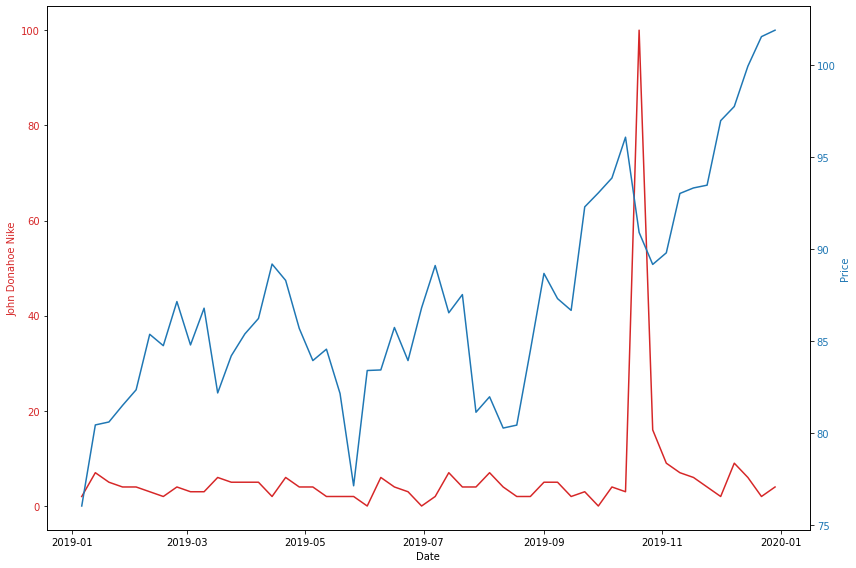

In [333]:
fig, ax1 = plt.subplots(figsize=(12,8))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('John Donahoe Nike', color=color)
ax1.plot(nike_2019['Date'], nike_2019['John Donahoe Nike'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price', color=color)
ax2.plot(nike_2019['Date'], nike_2019['Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()